Simple Linear Regression

In [ ]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#reading the data from link
url = "http://bit.ly/w-data"
data1 = pd.read_csv(url)
print("Data imported successfully")

data1.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#Exploratory data analysis
print(data1.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


In [5]:
print(data1.info())
print(data1.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
Hours     float64
Scores      int64
dtype: object


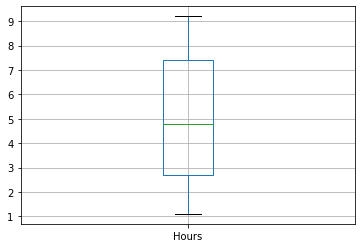

In [6]:
#boxplot to check for any outliers
data1.boxplot(column="Hours")

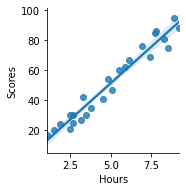

In [8]:
#pairplot to show relationship between Hours and Scores
sns.pairplot(data1,x_vars=["Hours"],y_vars=["Scores"],kind="reg")
plt.show()

In [30]:
#splitting of data 
X=data1.iloc[:,:-1]
Y=data1.iloc[:,1]

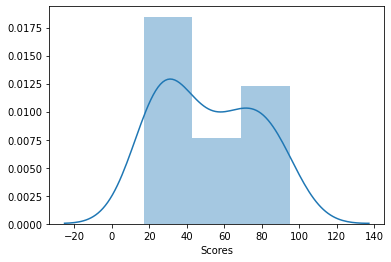

In [31]:
#distplot to check for frequency distribtion
sns.distplot(Y,hist=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C40C25E340>]],
      dtype=object)

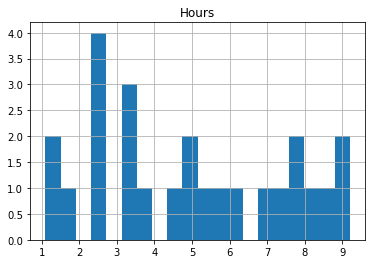

In [32]:
#frequency distribution on X variables
X.hist(bins=20)

In [33]:
#splitting the data into Train and Test data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [34]:
#fitting the Linear model on data
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
#print(lm.intercept_)
#print(lm.coef_)

LinearRegression()

In [35]:
print(lm.intercept_)
print(lm.coef_)

2.6499651894038863
[9.81430544]


In [36]:
print(list(zip(X.columns,lm.coef_)))

[('Hours', 9.814305443007635)]


In [37]:
#predict using test data
Y_pred=lm.predict(X_test)
print(Y_pred)

[17.37142335 52.70292295 35.03717315 34.05574261 46.81433968]


In [38]:
lm.score(X_train,Y_train)

0.95807022445042

In [40]:
#evaluating the model
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test,Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
adjusted_r_square=1-(1-r2)*(len(Y)-1)/len(Y)-(X.shape[1]-1)
print(adjusted_r_square)

0.6683995499740194
5.856684262506168
0.6816635679750587


In [41]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df 

,Actual,Predicted
5,20,17.371423
1,47,52.702923
13,42,35.037173
2,27,34.055743
12,41,46.814340


In [42]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))  

Mean Absolute Error: 5.632881746692995


In [43]:
print(min(Y_test))
print(max(Y_test))

20
47


In [44]:
df.to_excel("percentage_calculator.xlsx",header=True,index=True)

In [49]:
from sklearn.linear_model import Ridge
lm1=Ridge()
lm1.fit(X_train,Y_train)
print(lm1.coef_)
print(lm1.intercept_)

[9.74019354]
3.049057772105833


In [50]:
Y_pred=lm1.predict(X_test)
print(Y_pred)

[17.65934809 52.72404484 35.19169646 34.21767711 46.87992871]


In [51]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(Y_test,Y_pred)
print(r2)
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
adjusted_r_square=1-(1-r2)*(len(Y)-1)/len(Y)-(X.shape[1]-1)
print(adjusted_r_square)

0.6688616351466405
5.852602195641825
0.6821071697407749
